<a href="https://colab.research.google.com/github/marcelopaludetto/aulao-datascience/blob/main/aulaoDataScience_atualizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extraindo informações do Edutech

In [51]:
import pandas as pd

In [52]:
filenames = ['https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%201.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%202.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%203.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%204.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%205.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%206.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%207.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%208.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%209.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2010.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2011.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2012.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2013.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2014.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2015.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2016.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2017.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2018.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2019.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2020.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2021.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2022.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2023.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2024.csv']


dados = [pd.read_csv(f) for f in filenames] 

In [53]:
dados[0].columns

Index(['data', 'data de último acesso', 'id', 'email', 'cargo', 'teamId',
       'turmaTrilha', 'atividadesFeitas', 'atividadesCorretas',
       'atividadesGerais'],
      dtype='object')

In [54]:
for f in range(24):
 dados[f] = dados[f].drop(columns=['email'])

In [55]:
dados[0].head(10)

,data,data de último acesso,id,cargo,teamId,turmaTrilha,atividadesFeitas,atividadesCorretas,atividadesGerais
0,2021-04-19,2021-05-05,589685,REGULAR,14677,12400133,159,126,813.0
1,2021-04-19,2021-05-03,602784,REGULAR,14953,21406831,129,122,542.0
2,2021-04-19,2021-04-26,608608,REGULAR,15074,24400531,104,97,393.0
3,2021-04-19,2021-05-03,492948,REGULAR,"14972,17308","1656722,22400112",83,83,269.0
4,2021-04-19,2021-05-04,519898,REGULAR,15485,21900101,82,81,309.0
5,2021-04-19,2021-04-25,487571,REGULAR,15067,24400232,73,73,320.0
6,2021-04-19,2021-05-05,594650,REGULAR,14829,12407331,83,70,476.0
7,2021-04-19,2021-05-06,566760,REGULAR,14469,11400411,80,68,431.0
8,2021-04-19,2021-04-20,601746,REGULAR,14942,21405731,70,67,364.0
9,2021-04-19,2021-05-04,596252,REGULAR,14839,12408231,67,66,266.0


In [56]:
renomear = {'data' : 'data', 'data de último acesso' : 'data_ultimo_acesso', 'id' : 'id', 'cargo':'cargo', 'teamId':'teamId',
       'turmaTrilha':'turmaTrilha', 'atividadesFeitas':'atividadesFeitas', 'atividadesCorretas':'atividadesCorretas',
       'atividadesGerais': 'atividadesGerais'}

In [57]:
for f in range(24):
  dados[f] = dados[f].rename(columns = renomear)

dados[23].head()

,data,data_ultimo_acesso,id,cargo,teamId,turmaTrilha,atividadesFeitas,atividadesCorretas,atividadesGerais
0,2021-09-27,2021-09-28,738222,REGULAR,15923,1664785,161,159,610.0
1,2021-09-27,2021-09-28,733995,REGULAR,15923,1664785,121,104,448.0
2,2021-09-27,2021-09-27,737988,REGULAR,16133,1677432,89,89,313.0
3,2021-09-27,2021-09-28,590268,REGULAR,14851,12409431,84,84,309.0
4,2021-09-27,2021-09-28,729955,REGULAR,15874,1662777,84,84,340.0


# Número de estudantes no Edutech

In [58]:
for f in range(24):
  print('Na {} semana, estudantes = {}'.format(f+1,dados[f].data.count()))

Na 1 semana, estudantes = 67487
Na 2 semana, estudantes = 67487
Na 3 semana, estudantes = 67487
Na 4 semana, estudantes = 67487
Na 5 semana, estudantes = 67488
Na 6 semana, estudantes = 67745
Na 7 semana, estudantes = 70776
Na 8 semana, estudantes = 70842
Na 9 semana, estudantes = 47923
Na 10 semana, estudantes = 48010
Na 11 semana, estudantes = 48008
Na 12 semana, estudantes = 48511
Na 13 semana, estudantes = 48512
Na 14 semana, estudantes = 48719
Na 15 semana, estudantes = 46581
Na 16 semana, estudantes = 46704
Na 17 semana, estudantes = 46668
Na 18 semana, estudantes = 34791
Na 19 semana, estudantes = 38232
Na 20 semana, estudantes = 40717
Na 21 semana, estudantes = 41896
Na 22 semana, estudantes = 41902
Na 23 semana, estudantes = 42268
Na 24 semana, estudantes = 42268


In [59]:
print('Na semana {} foram incluidos {} estudantes no programa Edutech'.format(7,dados[6].data.count() - dados[5].data.count()))

Na semana 7 foram incluidos 3031 estudantes no programa Edutech


In [60]:
print('Na 9 semana, foram excluídos {} estudantes do programa Edutech'.format(dados[7].data.count() - dados[8].data.count()))

Na 9 semana, foram excluídos 22919 estudantes do programa Edutech


# Criar dias da semana no último acesso

In [61]:
for i in range(24):
  dia_da_semana = [];
  for f in range(dados[i].data_ultimo_acesso.count()):
      temp = pd.Timestamp(dados[i].data_ultimo_acesso[f])
      dia_da_semana.append(temp.day_name())
  dados[i]['dia_da_semana'] = dia_da_semana
  

In [62]:
dados[1].head()

,data,data_ultimo_acesso,id,cargo,teamId,turmaTrilha,atividadesFeitas,atividadesCorretas,atividadesGerais,dia_da_semana
0,2021-04-26,2021-05-05,589712,REGULAR,14688,12400431,165,139,699.0,Wednesday
1,2021-04-26,2021-05-06,575825,REGULAR,14660,11413411,146,124,726.0,Thursday
2,2021-04-26,2021-04-28,585090,REGULAR,15095,25400111,131,116,402.0,Wednesday
3,2021-04-26,2021-04-26,605128,REGULAR,15004,22402231,106,105,394.0,Monday
4,2021-04-26,2021-05-05,583378,REGULAR,14888,21400911,124,96,464.0,Wednesday


## Traduzir os dias da semana

In [63]:
dados[1].dia_da_semana.unique()

array(['Wednesday', 'Thursday', 'Monday', 'Sunday', 'Saturday', 'Tuesday',
       'Friday'], dtype=object)

In [64]:
renomear_dia = {
    'Wednesday' : 'Quarta',
    'Thursday' : 'Quinta',
    'Monday' : 'Segunda',
    'Sunday' : 'Domingo',
    'Saturday' : 'Sabado',
    'Tuesday' : 'Terca',
    'Friday' : 'Sexta'
}


In [65]:
for i in range(24):
  dados[i].dia_da_semana = dados[i].dia_da_semana.map(renomear_dia)


dados[1].head()

,data,data_ultimo_acesso,id,cargo,teamId,turmaTrilha,atividadesFeitas,atividadesCorretas,atividadesGerais,dia_da_semana
0,2021-04-26,2021-05-05,589712,REGULAR,14688,12400431,165,139,699.0,Quarta
1,2021-04-26,2021-05-06,575825,REGULAR,14660,11413411,146,124,726.0,Quinta
2,2021-04-26,2021-04-28,585090,REGULAR,15095,25400111,131,116,402.0,Quarta
3,2021-04-26,2021-04-26,605128,REGULAR,15004,22402231,106,105,394.0,Segunda
4,2021-04-26,2021-05-05,583378,REGULAR,14888,21400911,124,96,464.0,Quarta


In [70]:
dados[2].dia_da_semana.unique()

array(['Sexta', 'Domingo', 'Quinta', 'Terca', 'Segunda', 'Sabado',
       'Quarta'], dtype=object)

## Coletando o número de alunos ativos

In [66]:
for i in range(24):
  print('Na {} semana, o número de estudantes ativos no Edutech é de {}'.format(i+1,dados[i][dados[i]['atividadesGerais'].notnull()].data.count()))



Na 1 semana, o número de estudantes ativos no Edutech é de 6358
Na 2 semana, o número de estudantes ativos no Edutech é de 6619
Na 3 semana, o número de estudantes ativos no Edutech é de 6664
Na 4 semana, o número de estudantes ativos no Edutech é de 6696
Na 5 semana, o número de estudantes ativos no Edutech é de 6485
Na 6 semana, o número de estudantes ativos no Edutech é de 6879
Na 7 semana, o número de estudantes ativos no Edutech é de 5592
Na 8 semana, o número de estudantes ativos no Edutech é de 6439
Na 9 semana, o número de estudantes ativos no Edutech é de 6538
Na 10 semana, o número de estudantes ativos no Edutech é de 6352
Na 11 semana, o número de estudantes ativos no Edutech é de 5395
Na 12 semana, o número de estudantes ativos no Edutech é de 4297
Na 13 semana, o número de estudantes ativos no Edutech é de 1401
Na 14 semana, o número de estudantes ativos no Edutech é de 3676
Na 15 semana, o número de estudantes ativos no Edutech é de 5321
Na 16 semana, o número de estudant

In [67]:
for i in range(24):
  print('Na semana {} tivemos a porcentagem de alunos ativos no Edutech é de {} %'.format(i+1,(dados[i][dados[i]['atividadesGerais'].notnull()].data.count()/dados[i].data.count()*100).round(2)))


Na semana 1 tivemos a porcentagem de alunos ativos no Edutech é de 9.42 %
Na semana 2 tivemos a porcentagem de alunos ativos no Edutech é de 9.81 %
Na semana 3 tivemos a porcentagem de alunos ativos no Edutech é de 9.87 %
Na semana 4 tivemos a porcentagem de alunos ativos no Edutech é de 9.92 %
Na semana 5 tivemos a porcentagem de alunos ativos no Edutech é de 9.61 %
Na semana 6 tivemos a porcentagem de alunos ativos no Edutech é de 10.15 %
Na semana 7 tivemos a porcentagem de alunos ativos no Edutech é de 7.9 %
Na semana 8 tivemos a porcentagem de alunos ativos no Edutech é de 9.09 %
Na semana 9 tivemos a porcentagem de alunos ativos no Edutech é de 13.64 %
Na semana 10 tivemos a porcentagem de alunos ativos no Edutech é de 13.23 %
Na semana 11 tivemos a porcentagem de alunos ativos no Edutech é de 11.24 %
Na semana 12 tivemos a porcentagem de alunos ativos no Edutech é de 8.86 %
Na semana 13 tivemos a porcentagem de alunos ativos no Edutech é de 2.89 %
Na semana 14 tivemos a porcenta

# Analisando o número de atividades feitas por semana

In [ ]:
alunosAtivosDaSemana = [];
for i in range(24):
  alunosAtivosDaSemana.append(dados[i].query("atividadesGerais > 0"))

In [98]:
for i in range(24):
  print('Na semana {} foram realidas {} atividades'.format(i+1,sum(alunosAtivosDaSemana[i].atividadesFeitas)))

Na semana 1 foram realidas 28573 atividades
Na semana 2 foram realidas 30411 atividades
Na semana 3 foram realidas 32140 atividades
Na semana 4 foram realidas 36710 atividades
Na semana 5 foram realidas 32696 atividades
Na semana 6 foram realidas 35833 atividades
Na semana 7 foram realidas 27989 atividades
Na semana 8 foram realidas 32763 atividades
Na semana 9 foram realidas 31950 atividades
Na semana 10 foram realidas 30279 atividades
Na semana 11 foram realidas 25463 atividades
Na semana 12 foram realidas 21533 atividades
Na semana 13 foram realidas 7809 atividades
Na semana 14 foram realidas 18009 atividades
Na semana 15 foram realidas 27738 atividades
Na semana 16 foram realidas 29051 atividades
Na semana 17 foram realidas 29636 atividades
Na semana 18 foram realidas 33382 atividades
Na semana 19 foram realidas 36146 atividades
Na semana 20 foram realidas 42321 atividades
Na semana 21 foram realidas 37718 atividades
Na semana 22 foram realidas 52312 atividades
Na semana 23 foram r

# Gráficos

In [68]:
import seaborn as sns

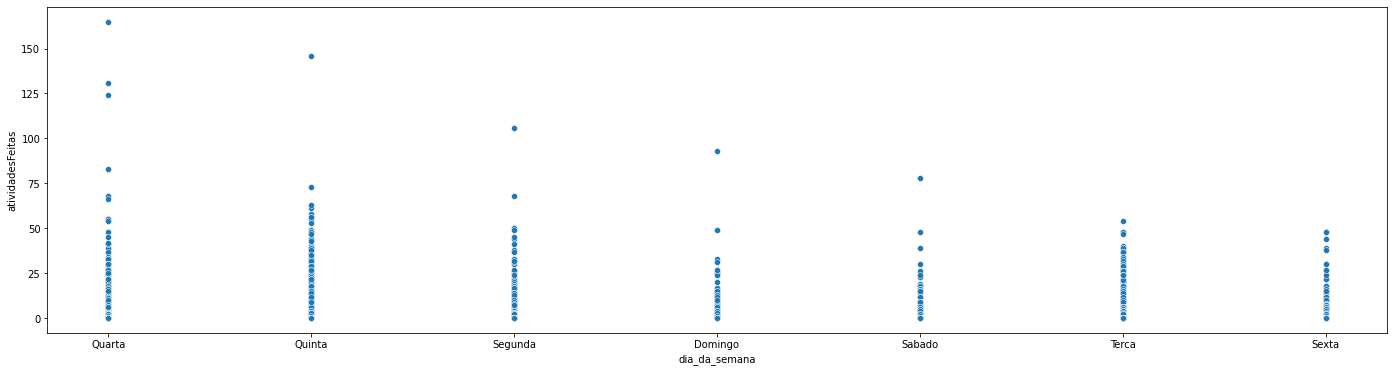

In [84]:
plt = sns.scatterplot(x='dia_da_semana',y='atividadesFeitas', data=dados[1])
plt.figure.set_size_inches(24,6)

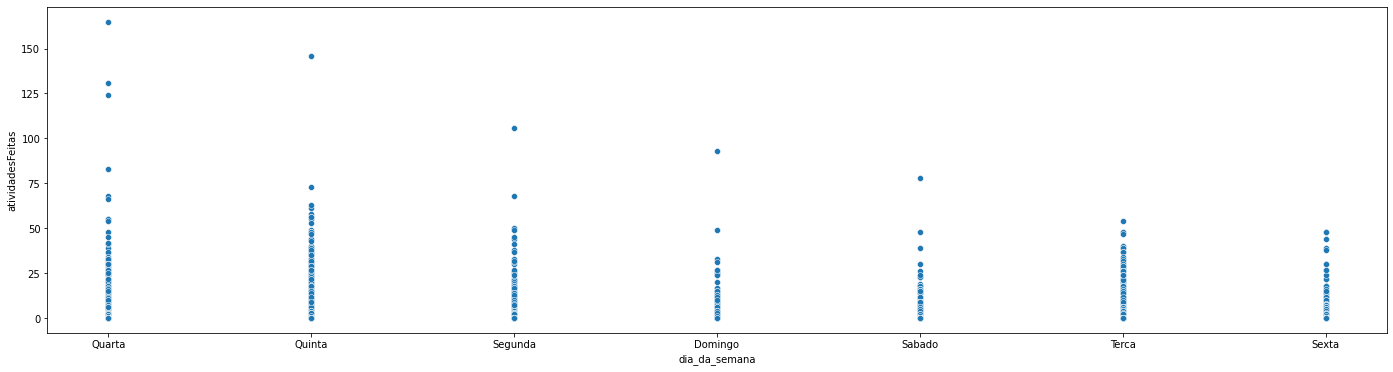

In [83]:
plt = sns.scatterplot(x='dia_da_semana',y='atividadesFeitas', data=alunosAtivosDaSemana[1])
plt.figure.set_size_inches(24,6)

# Organizando as datas no eixo X

In [108]:
for i in range(24):
  alunosAtivosDaSemana[i] = alunosAtivosDaSemana[i].sort_values(by = ['data_ultimo_acesso'])

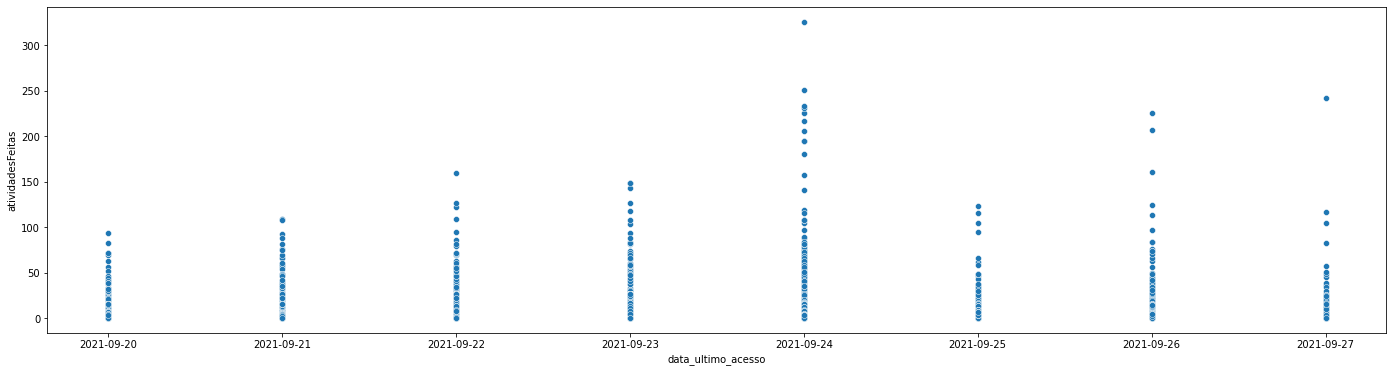

In [111]:
plt = sns.scatterplot(x='data_ultimo_acesso',y='atividadesFeitas', data=alunosAtivosDaSemana[22])
plt.figure.set_size_inches(24,6)

In [ ]:
plt = sns.scatterplot(x='data_ultimo_acesso',y='atividadesFeitas', data=dadosAtivos02)
plt.figure.set_size_inches(24,6)

In [ ]:
plt = sns.boxplot(x='data_ultimo_acesso',y='atividadesFeitas', data=dadosAtivos01)
plt.figure.set_size_inches(24,6)

In [ ]:
plt = sns.boxplot(x='data_ultimo_acesso',y='atividadesFeitas', data=dadosAtivos02)
plt.figure.set_size_inches(24,6)

In [ ]:
plt = sns.relplot(x='data_ultimo_acesso',y='atividadesFeitas', data=dadosAtivos01)
plt.figure.set_size_inches(24,6)

In [ ]:
plt = sns.relplot(x='data_ultimo_acesso',y='atividadesFeitas', data=dadosAtivos02)
plt.figure.set_size_inches(24,6)

In [ ]:
selecao = dadosAtivos02['data_ultimo_acesso'] == '2021-05-04'
dia04maioSemana2 = dadosAtivos02[selecao]
dia04maioSemana2

In [ ]:
selecao = dadosAtivos01['data_ultimo_acesso'] == '2021-05-04'
dia04maioSemana1 = dadosAtivos01[selecao]
dia04maioSemana1

# Análise de Frequências